In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import jieba
# import wordcloud
import collections
import matplotlib.pyplot as plt

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体  
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 


In [3]:
cols = ['user_id', 'user_name', 'user_djp', 'user_lev', 'event_count', 'follow_count', 'fan_count', 
        'user_intr', 'user_base', 'user_age']
df_userinfo = pd.read_csv('data/spiders_music163_user_info.csv', names=cols).fillna('')
df_userinfo['user_intr'] = df_userinfo['user_intr'].apply(lambda x:x.split('：')[-1])
# 地点，省份，城市
df_userinfo['user_base_p'] = df_userinfo['user_base'].apply(lambda x:x.split('-')[0]).replace('','无')
df_userinfo['user_base_c'] = df_userinfo['user_base'].apply(lambda x:x.split('-')[-1]).replace('','无')

print(df_userinfo.shape)
df_userinfo.head()

(3451, 12)


,user_id,user_name,user_djp,user_lev,event_count,follow_count,fan_count,user_intr,user_base,user_age,user_base_p,user_base_c
4,40136303,张思妄,华语|流行|民谣歌单达人、影视视频达人、图文达人,9,2022,12,106366,"【公众号:张思妄/ID:zhang-si-wang】念旧,伪文艺青年。愿用一生为哥哥做注解。",广东省 - 揭阳市,90后,广东省,揭阳市
5,367550234,许念辛,,9,2,6,25,I am not into u.,,-1,无,无
6,571083783,漠洈_,,7,53,1524,64,“纵使千疮百孔，年华老去，我还有你寻遍千山万水，踏破生死之距——再次相聚之前 ，谢谢你带我回...,,-1,无,无
7,262150512,010524-,,7,34,50,10,为什么不学习,河北省 - 石家庄市,-1,河北省,石家庄市
8,433267540,星海S7,,7,32,1564,46,原谅我有点笨,海外 - 哥伦比亚,00后,海外,哥伦比亚


In [ ]:
# 分词
lst_word_name = ' '.join(df_userinfo['user_name'].apply(lambda x:' '.join(jieba.cut(x))).values).split(' ')
lst_word_djp = ' '.join(df_userinfo['user_djp'].apply(lambda x:' '.join(jieba.cut(x))).values).split(' ')
lst_word_intr = ' '.join(df_userinfo['user_intr'].apply(lambda x:' '.join(jieba.cut(x))).values).split(' ')

collections.Counter(lst_word_intr)

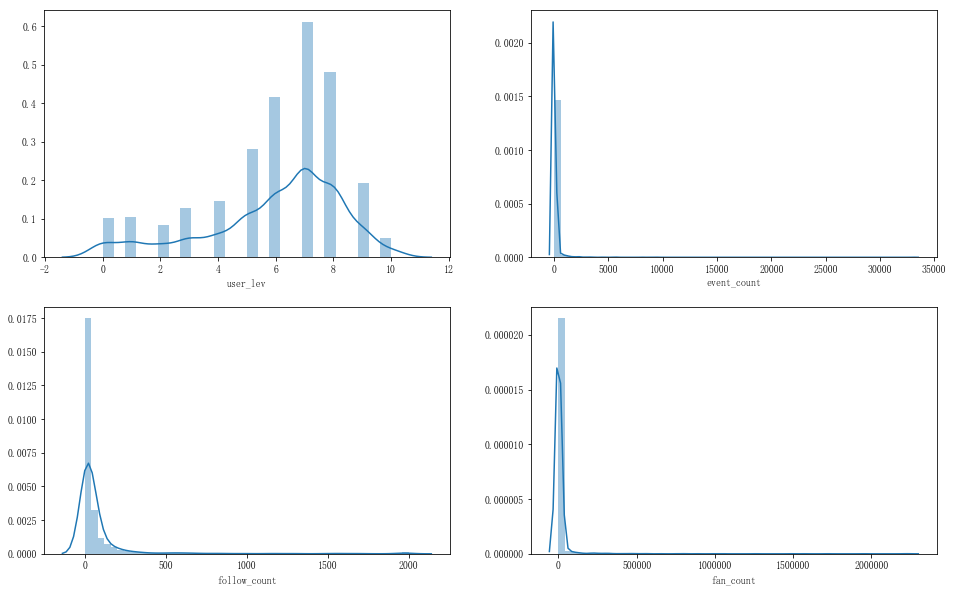

In [114]:
# 各数量分布
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.distplot(df_userinfo['user_lev'])
plt.subplot(222)
sns.distplot(df_userinfo['event_count'])
plt.subplot(223)
sns.distplot(df_userinfo['follow_count'])
plt.subplot(224)
sns.distplot(df_userinfo['fan_count'])
plt.show()

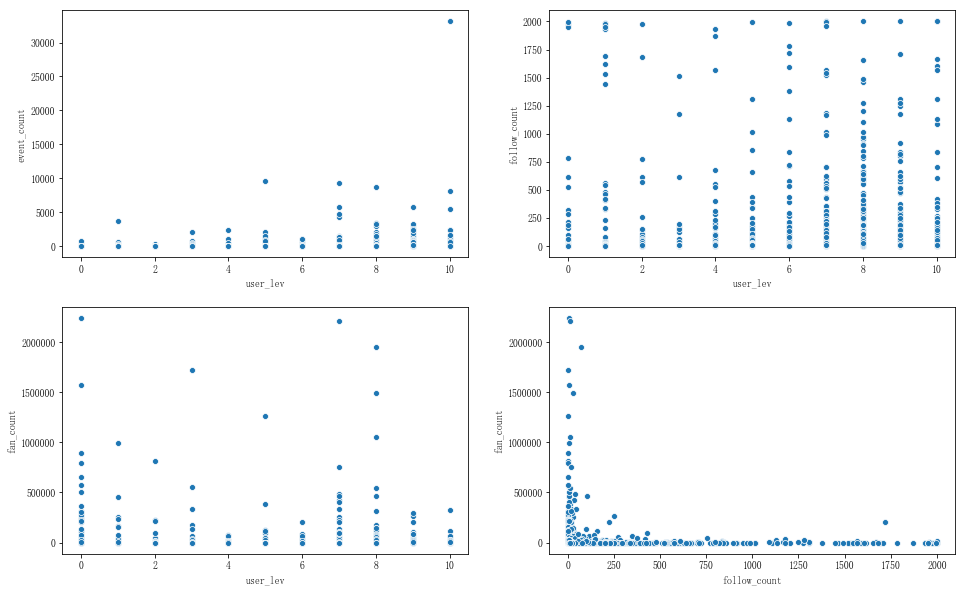

In [113]:
# 各数量之间关系
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.scatterplot(df_userinfo['user_lev'], df_userinfo['event_count'])
plt.subplot(222)
sns.scatterplot(df_userinfo['user_lev'], df_userinfo['follow_count'])
plt.subplot(223)
sns.scatterplot(df_userinfo['user_lev'], df_userinfo['fan_count'])
plt.subplot(224)
sns.scatterplot(df_userinfo['follow_count'], df_userinfo['fan_count'])
plt.show()

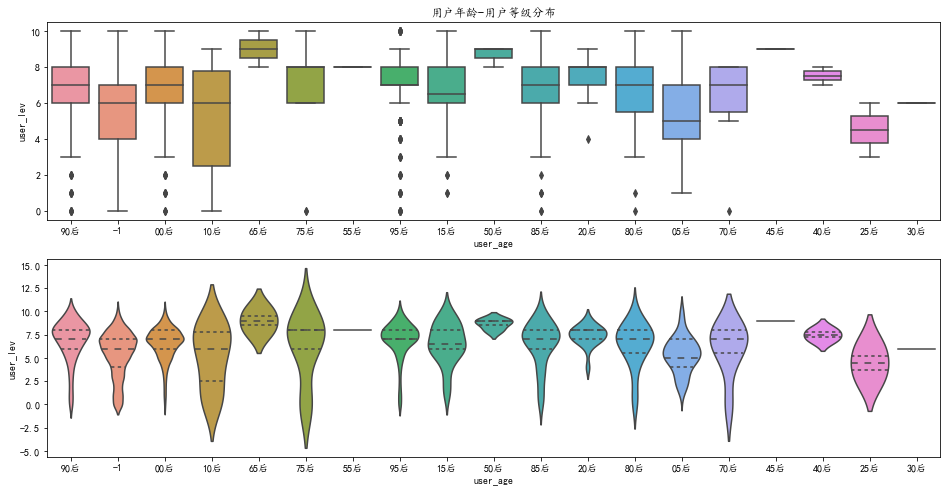

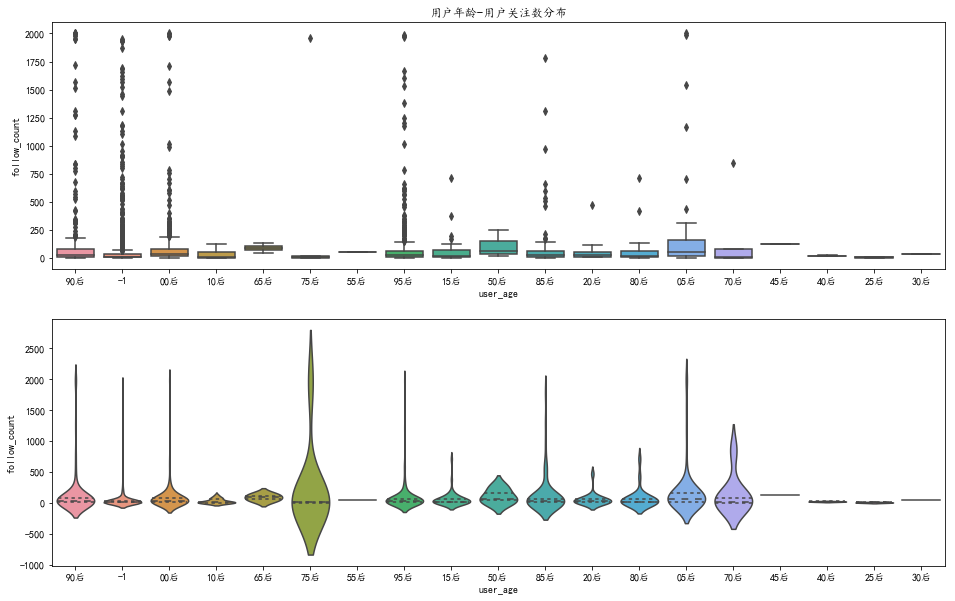

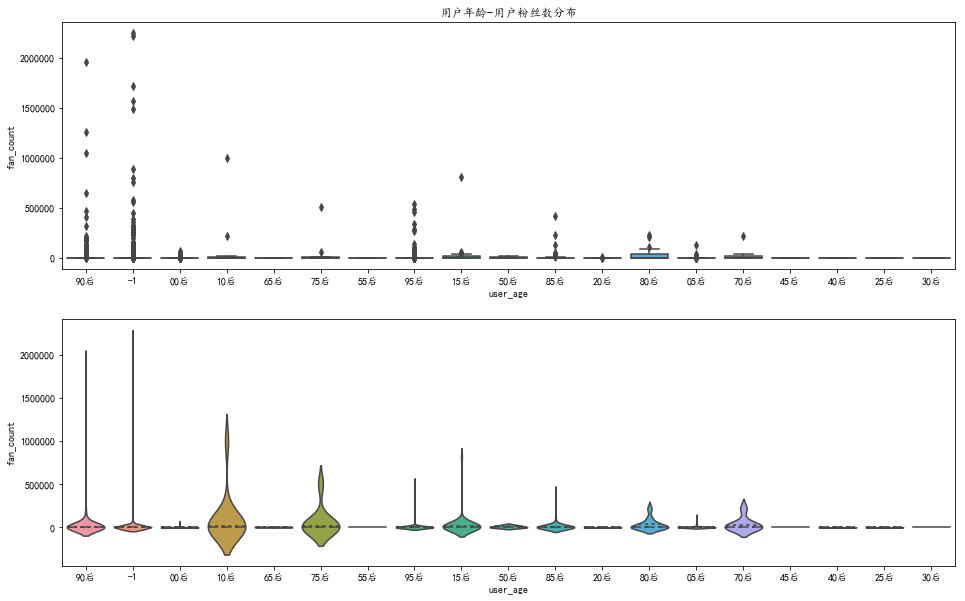

In [136]:
# 用户不同年龄段分布
plt.figure(figsize=(16,8))
plt.subplot(211)
sns.boxplot(df_userinfo['user_age'], df_userinfo['user_lev'])
plt.title('用户年龄-用户等级分布')
plt.subplot(212)
sns.violinplot(df_userinfo['user_age'], df_userinfo['user_lev'], scale='width', inner='quartitle')
plt.show()

plt.figure(figsize=(16,10))
plt.subplot(211)
sns.boxplot(df_userinfo['user_age'], df_userinfo['follow_count'])
plt.title('用户年龄-用户关注数分布')
plt.subplot(212)
sns.violinplot(df_userinfo['user_age'], df_userinfo['follow_count'], scale='width', inner='quartitle')
plt.show()

plt.figure(figsize=(16,10))
plt.subplot(211)
sns.boxplot(df_userinfo['user_age'], df_userinfo['fan_count'])
plt.title('用户年龄-用户粉丝数分布')
plt.subplot(212)
sns.violinplot(df_userinfo['user_age'], df_userinfo['fan_count'], scale='width', inner='quartitle')
plt.show()

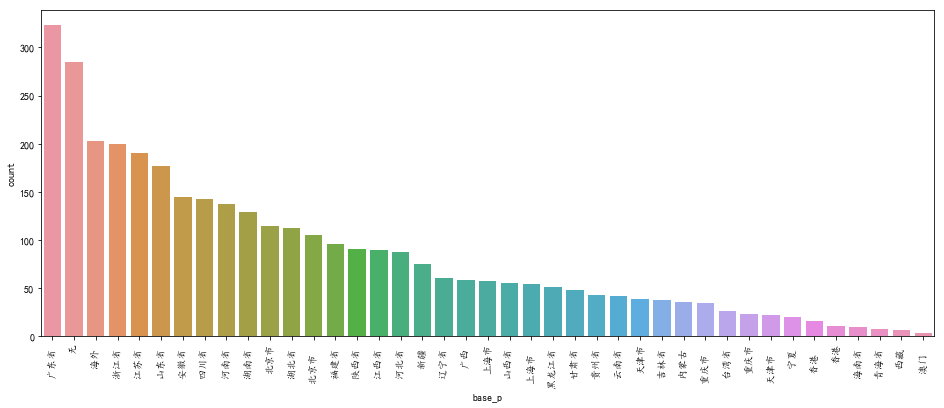

In [158]:
counts_base_p = df_userinfo['user_base_p'].value_counts().reset_index()
counts_base_p.columns=['base_p', 'count']
plt.figure(figsize=(16,6))
sns.barplot(counts_base_p['base_p'], counts_base_p['count'])
plt.xticks(rotation=90)
plt.show()

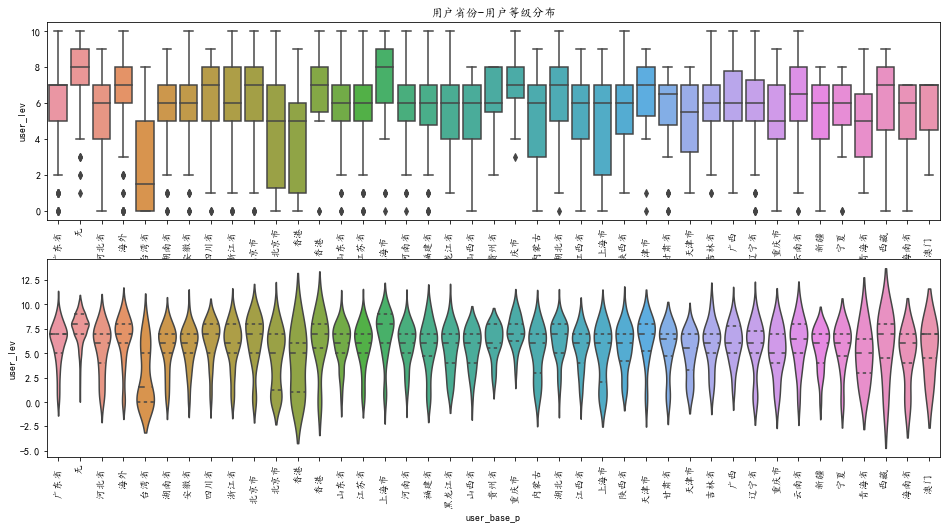

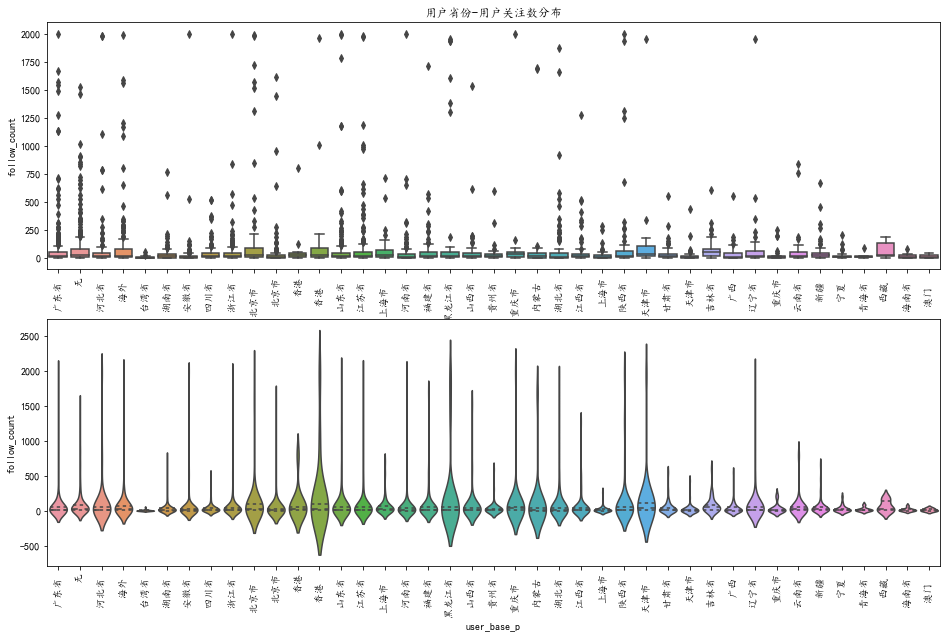

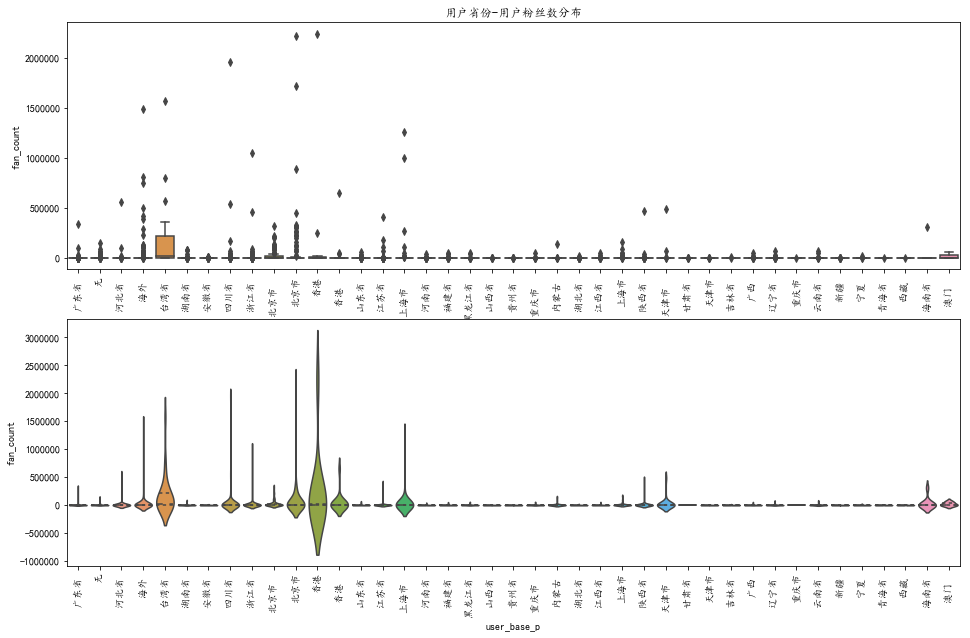

In [141]:
# 用户不同省份分布
plt.figure(figsize=(16,8))
plt.subplot(211)
sns.boxplot(df_userinfo['user_base_p'], df_userinfo['user_lev'])
plt.title('用户省份-用户等级分布')
plt.xticks(rotation=90)
plt.subplot(212)
sns.violinplot(df_userinfo['user_base_p'], df_userinfo['user_lev'], scale='width', inner='quartitle')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(16,10))
plt.subplot(211)
sns.boxplot(df_userinfo['user_base_p'], df_userinfo['follow_count'])
plt.title('用户省份-用户关注数分布')
plt.xticks(rotation=90)
plt.subplot(212)
sns.violinplot(df_userinfo['user_base_p'], df_userinfo['follow_count'], scale='width', inner='quartitle')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(16,10))
plt.subplot(211)
sns.boxplot(df_userinfo['user_base_p'], df_userinfo['fan_count'])
plt.title('用户省份-用户粉丝数分布')
plt.xticks(rotation=90)
plt.subplot(212)
sns.violinplot(df_userinfo['user_base_p'], df_userinfo['fan_count'], scale='width', inner='quartitle')
plt.xticks(rotation=90)
plt.show()